In [49]:
import json
import os
import steady_state_detection as ssd

In [50]:
data_dir = '../data'

forks = {'raphw__byte-buddy#net.bytebuddy.benchmark.ClassByExtensionBenchmark.benchmarkByteBuddyWithAccessorAndReusedDelegatorWithTypePool#.json': 5,
         'eclipse__rdf4j#org.eclipse.rdf4j.benchmark.QueryOrderBenchmark.selectAll#countk=50&limit=10000&syncThreshold=0.json': 9,
         'crate__crate#io.crate.analyze.PreExecutionBenchmark.measureParseAndAnalyzeSimpleSelect#.json': 6,
         'yellowstonegames__SquidLib#squidpony.performance.DataStructureBenchmark.insertIntegerLinkedHashMap2#NEED_TO_ENLARGE=1&SIZE=65536.json': 4,
         'jdbi__jdbi#org.jdbi.v3.benchmark.sqlobject.H2SqlObjectV3Benchmark.attach#.json': 7,
         'cantaloupe-project__cantaloupe#edu.illinois.library.cantaloupe.perf.processor.codec.TIFFImageWriterPerformance.testWriteWithPlanarImage#.json': 1,
         'jgrapht__jgrapht#org.jgrapht.perf.connectivity.TreeDynamicConnectivityPerformanceTest.testTreeDynamicConnectivity#treeSize=1000.json': 7,
         'eclipse__jetty.project#org.eclipse.jetty.util.PoolStrategyBenchmark.testAcquireReleasePoolWithStrategy#CACHE=true&POOL_TYPE=Pool.RoundRobin&SIZE=16.json': 8,
         'RoaringBitmap__RoaringBitmap#org.roaringbitmap.iteration.BatchIteratorBenchmark.iterate#bufferSize=512&dirtiness=0.1&keys=2096&runniness=0.1.json': 3,
         'zalando__logbook#org.zalando.logbook.HttpLogFormatterBenchmark.fastJsonResponse#.json': 3,
         'apache__logging-log4j2#org.apache.logging.log4j.layout.template.json.JsonTemplateLayoutBenchmark.fullCustomJsonLayout#.json': 0,
         'apache__tinkerpop#org.apache.tinkerpop.gremlin.driver.GraphSONMapperBenchmark.readBytecode2#.json': 2,
         'prestodb__presto#com.facebook.presto.operator.scalar.StringFunctionsBenchmark.benchmarkSubstringStartLengthFromEnd#ascii=false&length=10.json': 2,
         'imglib__imglib2#net.imglib2.loops.SyncedPositionablesBenchmark.benchmark2#.json': 3,
         'jdbi__jdbi#org.jdbi.v3.benchmark.QualifiersBenchmark.neq4To4#.json': 0,
         'h2oai__h2o-3#water.util.IcedHashMapBench.writeMap#arrayType=PrimitiveArray&array_values_length=10000&keyType=String&n_entries=10&valueType=Boolean.json': 5,
         'ReactiveX__RxJava#io.reactivex.rxjava3.xmapz.FlowableConcatMapMaybeEmptyPerf.flowableDedicated#count=1000000.json': 3}

timeseries_idx = -4
timeseries_fname = list(forks.keys())[timeseries_idx]
fork_idx = list(forks.values())[timeseries_idx]
print(f'Timeseries name: {timeseries_fname}')

timeseries = json.load(open(os.path.join(data_dir, 'timeseries/all', timeseries_fname)))[fork_idx]
classification = json.load(open(os.path.join(data_dir, 'classification', timeseries_fname)))['steady_state_starts'][fork_idx]

Timeseries name: imglib__imglib2#net.imglib2.loops.SyncedPositionablesBenchmark.benchmark2#.json


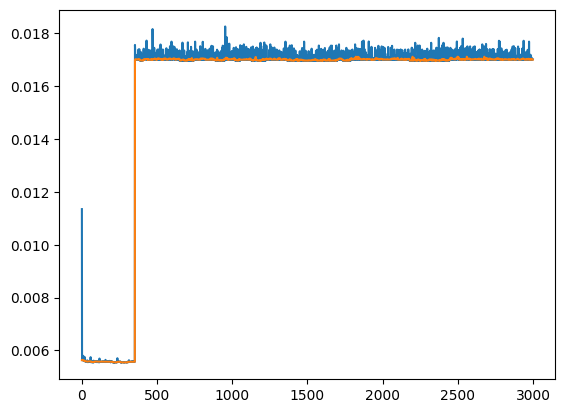

In [51]:
import scipy.signal as ssi
import matplotlib.pyplot as plt
plt.figure()
plt.plot(timeseries)
plt.plot(ssi.medfilt(timeseries,kernel_size=15))
plt.show()

In [52]:
P, warmup_end = ssd.detect_steady_state(timeseries, prob_win_size=100, t_crit=1.9, step_win_size=50)
print(warmup_end, classification)
print(timeseries[:20])

-1 350
[0.011347740444444445, 0.005686158222222223, 0.005655210666666667, 0.0056470186666666665, 0.005643377777777778, 0.005637006222222223, 0.005626538666666668, 0.0056379164444444445, 0.005620622222222222, 0.005792654222222223, 0.005629269333333334, 0.005625173333333334, 0.0056019626666666674, 0.005601507555555556, 0.005621077333333335, 0.005598321777777778, 0.005596046222222223, 0.005591950222222222, 0.005594680888888889, 0.0057435022222222226]


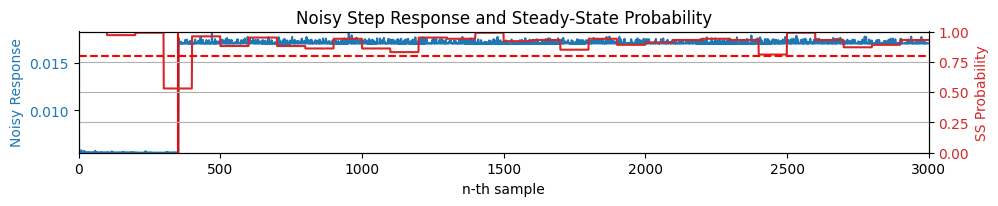

(0, 99): 1.0
(100, 199): 0.97
(200, 299): 0.99
(300, 399): 0.53
(400, 499): 0.96
(500, 599): 0.88
(600, 699): 0.95
(700, 799): 0.88
(800, 899): 0.86
(900, 999): 0.94
(1000, 1099): 0.86
(1100, 1199): 0.83
(1200, 1299): 0.95
(1300, 1399): 0.94
(1400, 1499): 0.99
(1500, 1599): 0.92
(1600, 1699): 0.93
(1700, 1799): 0.85
(1800, 1899): 0.94
(1900, 1999): 0.89
(2000, 2099): 0.91
(2100, 2199): 0.93
(2200, 2299): 0.94
(2300, 2399): 0.93
(2400, 2499): 0.81
(2500, 2599): 0.99
(2600, 2699): 0.93
(2700, 2799): 0.87
(2800, 2899): 0.89
(2900, 2999): 0.93


In [53]:
ssd.print_fork(timeseries, P, warmup_end, classification, min(timeseries), max(timeseries))

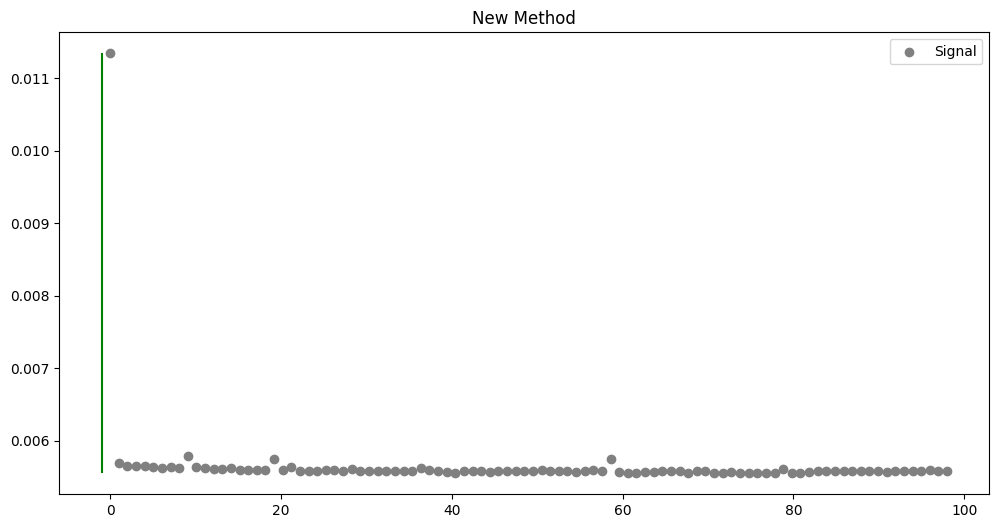

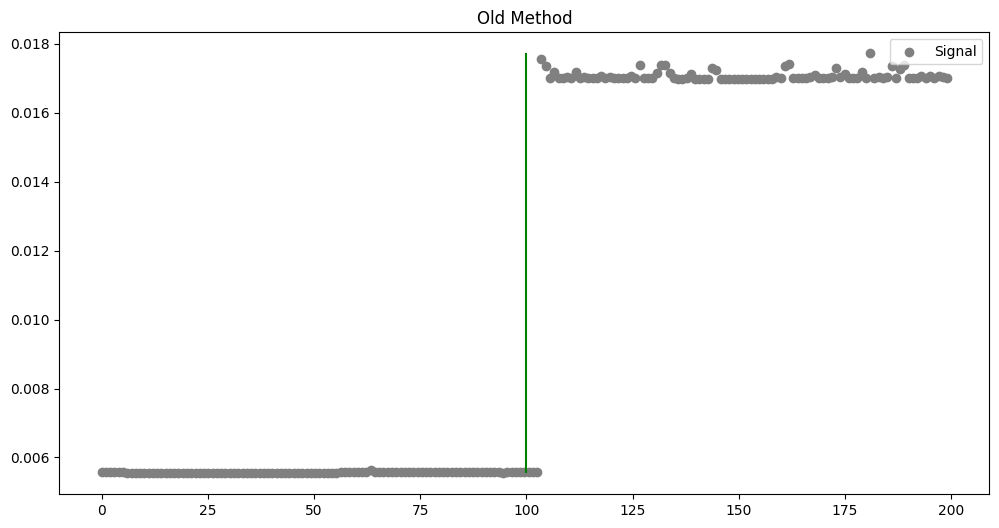

In [54]:
window = 100
ssd.plot_step(timeseries, warmup_end, window, 'New Method')
ssd.plot_step(timeseries, classification, window, 'Old Method')

Difference in medians: -1.092266666666633e-05
Median of all data: 0.017006592


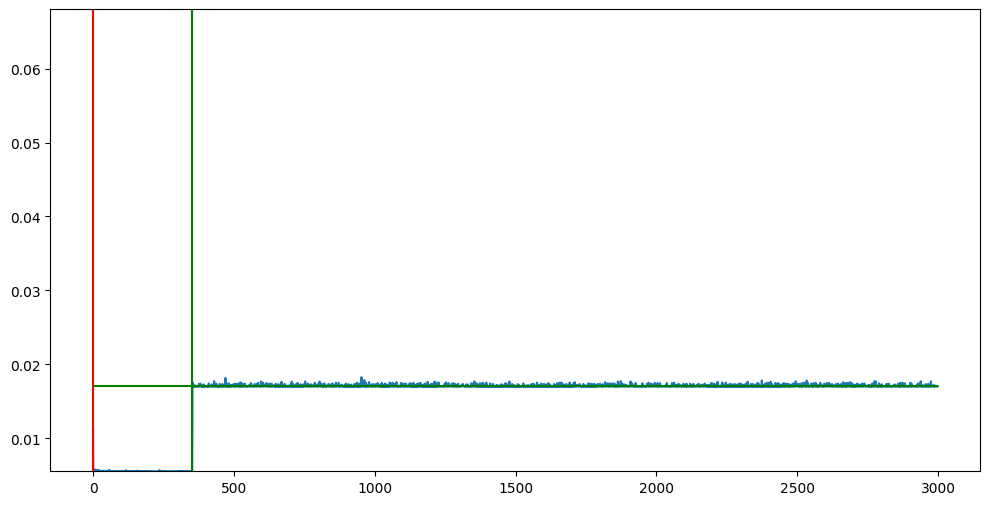

In [55]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(timeseries)
plt.ylim(min(timeseries), 4*np.median(timeseries))
plt.vlines(warmup_end, min(timeseries), 4*np.median(timeseries), colors='r')
plt.vlines(classification,min(timeseries), 4*np.median(timeseries), colors='g')
plt.hlines(np.median(timeseries[:warmup_end]),0, warmup_end, colors='r')
plt.hlines(np.median(timeseries[warmup_end:]),warmup_end, len(timeseries),colors='g')
print(f'Difference in medians: {np.median(timeseries[:warmup_end])-np.median(timeseries[warmup_end:])}')
print(f'Median of all data: {np.median(timeseries)}')

plt.show()

In [56]:
path = f'{data_dir}/timeseries/all'

os.mkdir(f'{data_dir}/new_classification')

for filename in os.listdir(path):
    f = os.path.join(path, filename)

    if os.path.isfile(f):
        print(filename)
        # Read all the forks for the configuration
        forks = json.load(open(os.path.join(path, filename)))

        single_config_res = []

        # Iterate over forks
        for i, fork in enumerate(forks):
            print(f'Fork ID: {i}')
            P, warmup_end = ssd.detect_steady_state(fork, prob_win_size=100, t_crit=1.9, step_win_size=50, medfilt_kernel_size=15)
            single_config_res.append(ssd.get_compact_result(P, warmup_end))

        json.dump(single_config_res, open(f'{data_dir}/new_classification/{filename}', 'w+'), indent=4)

FileExistsError: [Errno 17] File exists: '../data/new_classification'